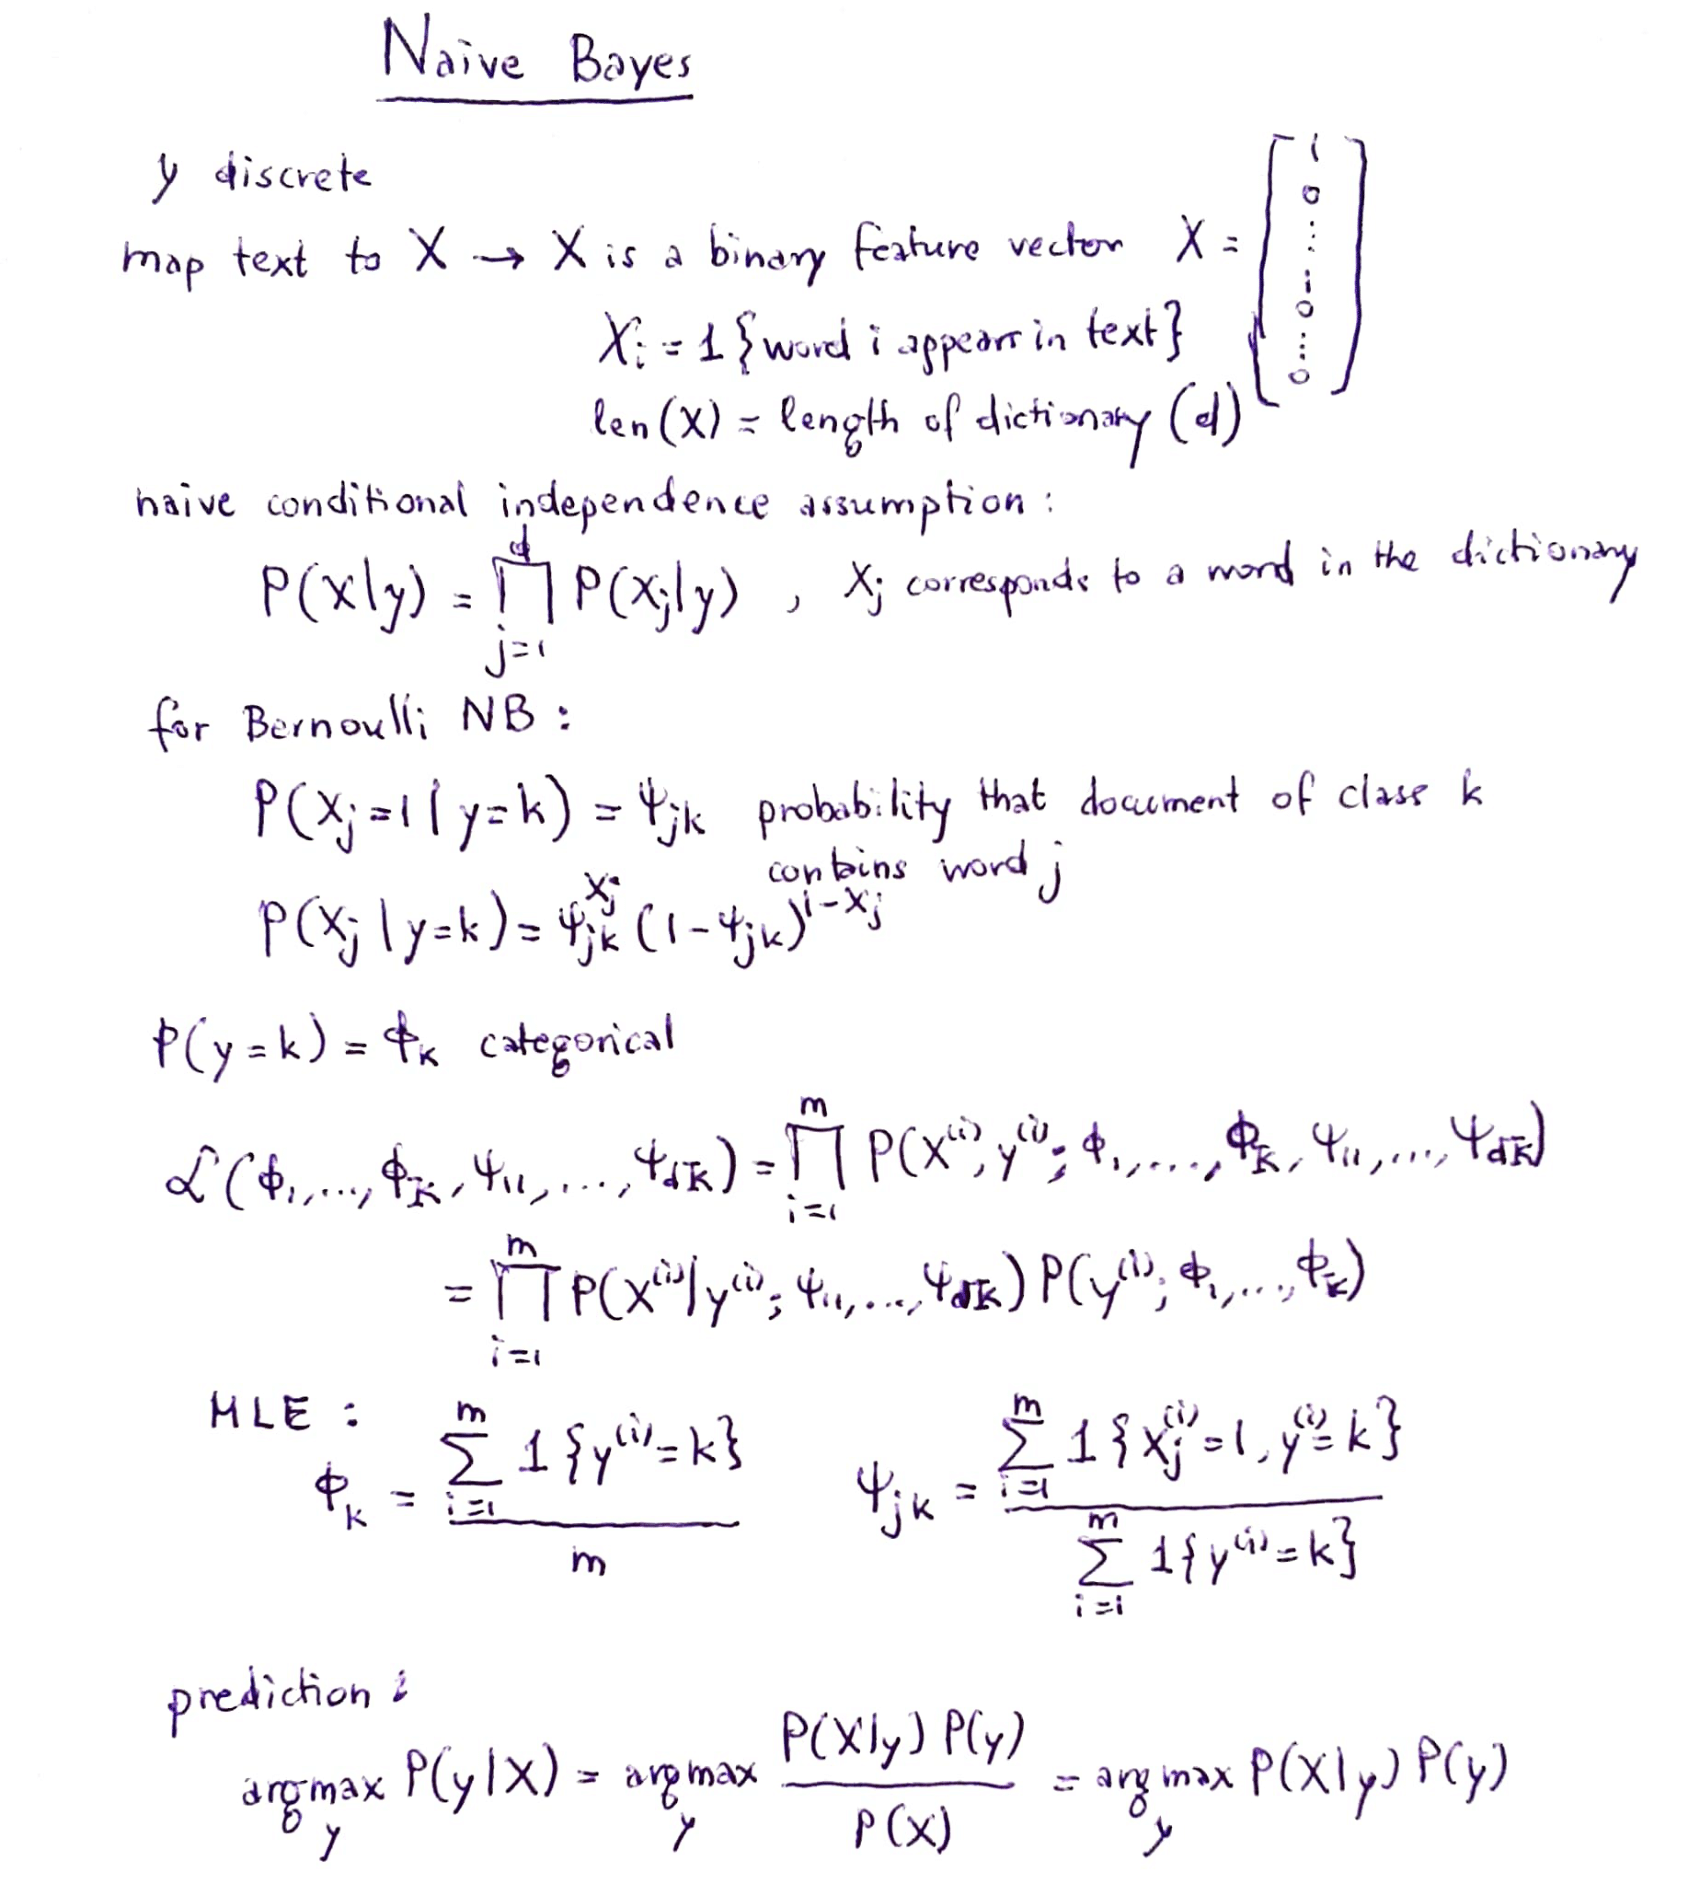

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
class NaiveBayes:
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # _ - private attribute or method of a class (accessed only within the class)
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self._psis = np.zeros((n_classes, n_features), dtype=float)
        self._phis = np.zeros(n_classes, dtype=float)
        for k in range(n_classes):
            X_k = X[y == k]
            self._psis[k] = X_k.mean(axis=0)
            self._phis[k] = X_k.shape[0] / float(n_samples)
        # np.clip() - clip (limit) the values in an array
        self._psis = self._psis.clip(1e-14, 1-1e-14)
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        posteriors = []
        for k in range(len(self._classes)):
            logpy = np.log(self._phis[k])
            logpxy = x*np.log(self._psis[k]) + (1-x)*np.log(1-self._psis[k])
            logpyx = np.sum(logpxy) + logpy
            posteriors.append(logpyx)
        return np.argmax(posteriors)

In [10]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True,
                                random_state=42)
print(twenty_train.data[0])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [17]:
# CountVectorizer() - convert a collection of text documents to a matrix of token counts
#   binary - if True, all non zero counts are set to 1
#   max_features - if not None, build a vocabulary that only consider the top max_features 
#                  ordered by term frequency across the corpus
count_vect = CountVectorizer(binary=True, max_features=10000)
# CountVectorizer.fit_transform() - learn the vocabulary and return document-term matrix
X_train = count_vect.fit_transform(twenty_train.data).toarray()
y_train = twenty_train.target
X_train.shape, y_train.shape, np.unique(y_train)

((2257, 10000), (2257,), array([0, 1, 2, 3]))

In [28]:
nb = NaiveBayes()
nb.fit(X_train, y_train)

In [29]:
y_pred = nb.predict(X_train)
(y_pred == y_train).mean()

0.9920248116969429

In [30]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True,
                                random_state=42)
X_test = count_vect.transform(twenty_test.data).toarray()
y_test = twenty_test.target
y_pred_test = nb.predict(X_test)
(y_pred_test == y_test).mean()

0.9161118508655126